<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/HW3/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing heatmaps of class activation

In [69]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-18 01:00:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   229MB/s    in 0.3s    

2019-04-18 01:00:06 (229 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
#Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
img_path1 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2020.jpg'
img_path2 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2021.jpg'
img_path3 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2020.jpg'
img_path4 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2021.jpg'

In [73]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [75]:
# compile model
model.compile(
    loss='binary_crossentropy',
    
    # choose a smaller learning rate
    
    optimizer=optimizers.RMSprop(lr=1e-5), 
    metrics=['acc'])

# train
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 22s 217ms/step - loss: 0.5979 - acc: 0.6850 - val_loss: 0.3862 - val_acc: 0.8380
Epoch 2/50
100/100 [==============================] - 20s 203ms/step - loss: 0.4276 - acc: 0.8055 - val_loss: 0.2792 - val_acc: 0.8750
Epoch 3/50
100/100 [==============================] - 19s 189ms/step - loss: 0.3399 - acc: 0.8530 - val_loss: 0.2590 - val_acc: 0.8910
Epoch 4/50
100/100 [==============================] - 19s 188ms/step - loss: 0.3028 - acc: 0.8685 - val_loss: 0.2185 - val_acc: 0.9090
Epoch 5/50
100/100 [==============================] - 19s 189ms/step - loss: 0.2903 - acc: 0.8685 - val_loss: 0.2947 - val_acc: 0.8640
Epoch 6/50
100/100 [==============================] - 20s 203ms/step - loss: 0.2728 - acc: 0.8875 - val_loss: 0.2094 - val_acc: 0.9080
Epoch 7/50
100/100 [==============================] - 19s 190ms/step - loss: 0.2481 - acc: 0.9000 - val_loss: 0.1955 - val_acc: 0.9160
Epoch 8/50
100/100 [==============================] - 1

In [0]:
from keras.applications import VGG19
conv_base = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))
last_output = conv_base.output
conv_base.trainable = False
for layer in conv_base.layers:
  layer.trainable = False
from keras.layers import Flatten, Dense, Dropout
from keras import models
from keras import optimizers
from tensorflow.keras import Model
new = Flatten()(last_output)
new = Dense(256, activation='relu')(new)
new = Dropout(0.1)(new)
new = Dense(512,activation='relu')(new)
new = Dense(1, activation='sigmoid')(new)
# Configure and compile the model
model = models.Model(conv_base.input, new)
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [0]:
#compile model

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

In [0]:
last_conv_layer = model.get_layer('block5_conv4')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

In [0]:
def show_superimposed_image(img_path, heatmap):
  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(150, 150))
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  class_output = model.output[:, 0]
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  #
  show_superimposed_image(img_path, heatmap)

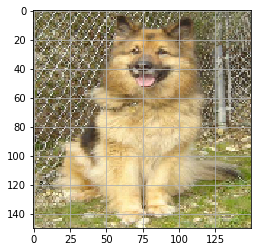

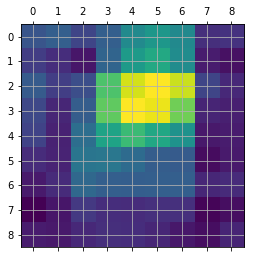

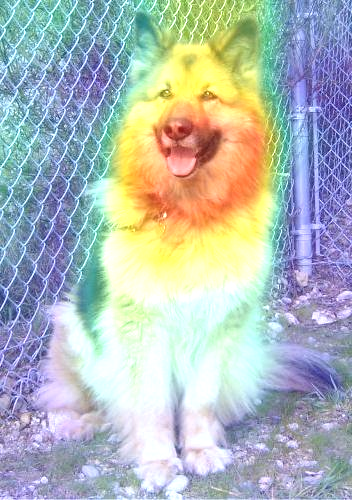

In [83]:
process_image(img_path1)

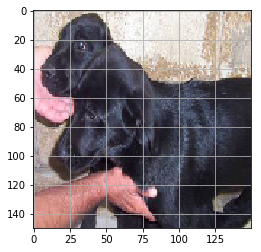

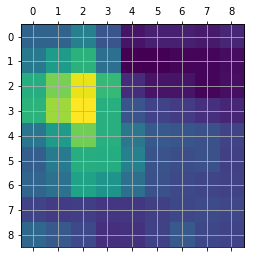

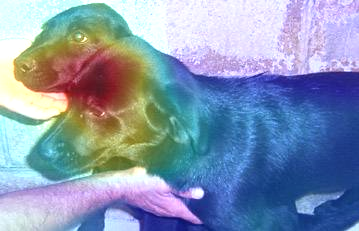

In [84]:
process_image(img_path2)

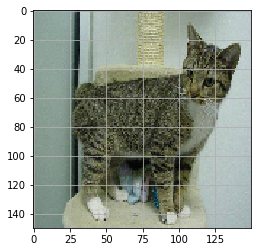

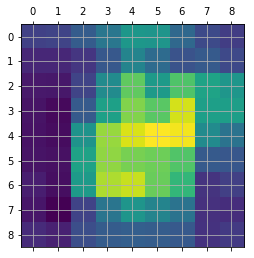

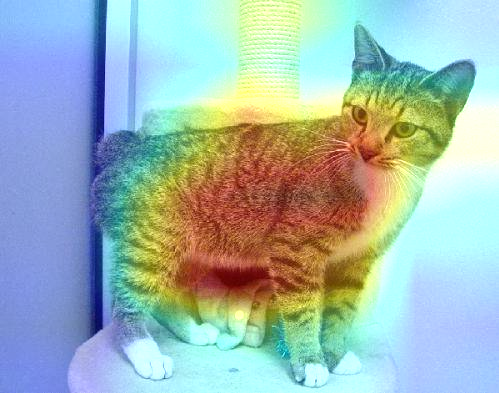

In [85]:
process_image(img_path3, idx=1)

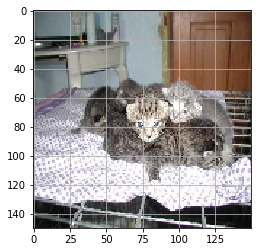

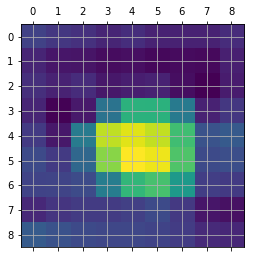

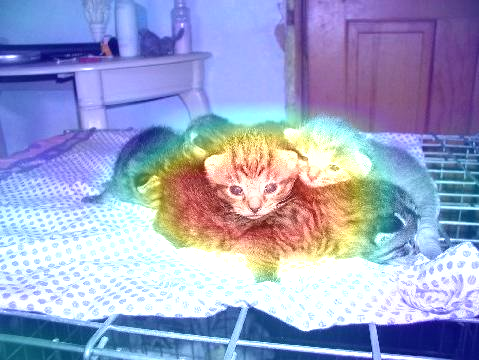

In [86]:
process_image(img_path4)